In [155]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.feature_selection import SelectKBest,chi2
import joblib
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
df=pd.read_csv('insurance.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

# our target column is :
    fraud_reported

In [97]:
print('the number of Rows and Columns are : ',df.shape)

the number of Rows and Columns are :  (1000, 40)


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [99]:
#drop c39 as no values are present
df=df.drop(['_c39'],axis=1)

In [100]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

# There is missing data in the form of '?' as a datapoint in few columns lets check

In [101]:
for i in df.columns:
    if 0<len(df[df[i]=='?']):
        print(i)
        print(len(df[df[i]=='?']))

collision_type
178
property_damage
360
police_report_available
343


# fill the special characters with the most frequent value in the particular column

In [102]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [103]:
df['collision_type']=df['collision_type'].replace("?",df['collision_type'].mode().iloc[0])

In [104]:
df['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [105]:
df['police_report_available']=df['police_report_available'].replace("?",np.nan)

In [106]:
df['police_report_available']=df['police_report_available'].fillna(df['police_report_available'].mode().iloc[0])

In [107]:
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

In [108]:
for i in range(len(df['property_damage'])):
    if df['property_damage'][i]=='?':
        if df['incident_severity'][i]=='Major Damage':
            df['property_damage'][i]='YES'
        else:
            df['property_damage'][i]='NO'

In [109]:
df['property_damage'].value_counts()

NO     583
YES    417
Name: property_damage, dtype: int64

# we have filled the Dataset 

In [111]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

# EDA and VISUALIZATION

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

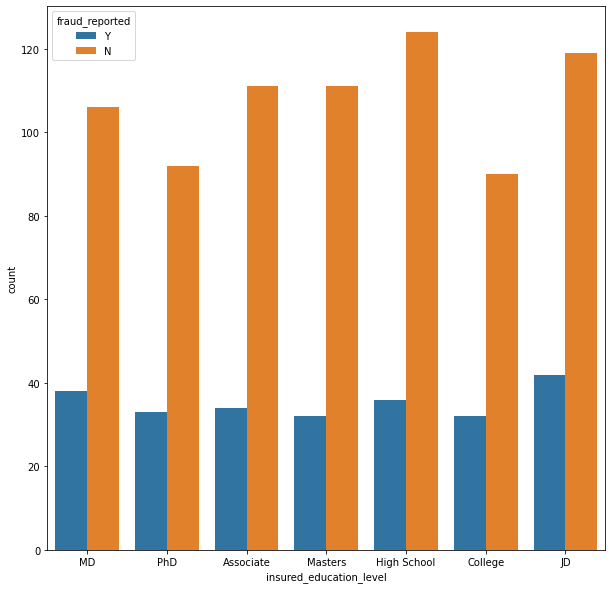

In [112]:
plt.figure(figsize=(10,10))
sns.countplot(x='insured_education_level',hue='fraud_reported',data=df)

# fraud reported with education level JD is the highest

<AxesSubplot:xlabel='policy_state', ylabel='count'>

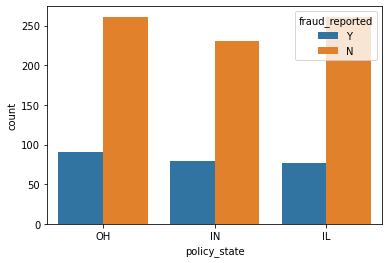

In [113]:
sns.countplot(x='policy_state',hue='fraud_reported',data=df)

# state that reported most fraud is OH

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

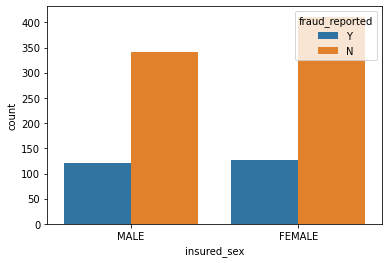

In [114]:
sns.countplot(x='insured_sex',hue='fraud_reported',data=df)

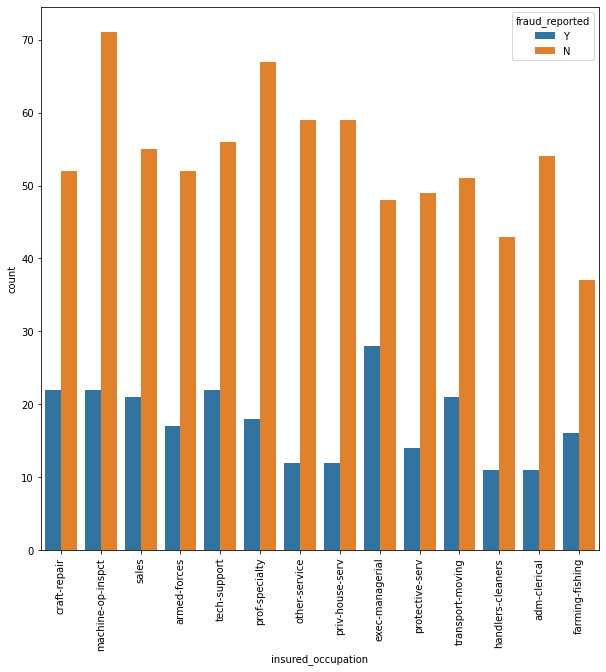

In [115]:
plt.figure(figsize=(10,10))
sns.countplot(x='insured_occupation',hue='fraud_reported',data=df)
plt.xticks(rotation=90)
plt.show()

# frauds reported with exec-managerial post was the highest

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

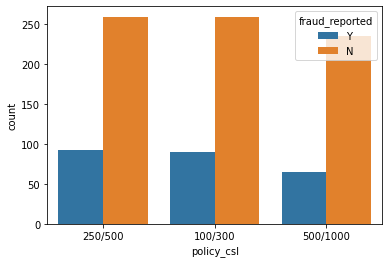

In [116]:
sns.countplot(x='policy_csl',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='property_damage', ylabel='count'>

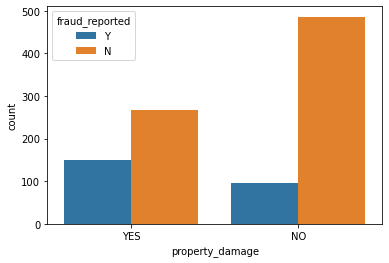

In [117]:
sns.countplot(x='property_damage',hue='fraud_reported',data=df)

# frauds reported with property damage was the highest

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

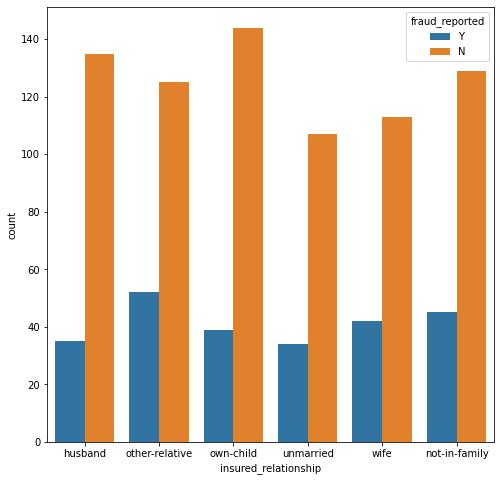

In [118]:
plt.figure(figsize=(8,8))
sns.countplot(x='insured_relationship',hue='fraud_reported',data=df)

# frauds reported are highest when they are insured on other relatives name

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

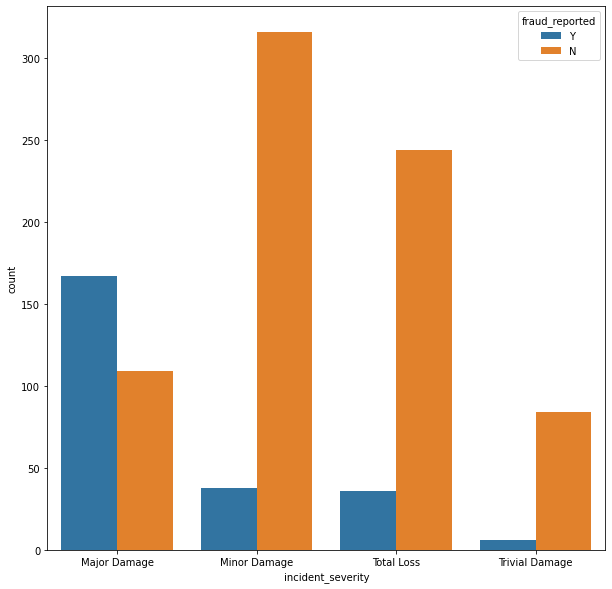

In [119]:
plt.figure(figsize=(10,10))
sns.countplot(x='incident_severity',hue='fraud_reported',data=df)

# frauds reported with major damge were the highest 

# encoding the object type data into numerical

In [120]:
#using label encoder to convert the data
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [121]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                 int32
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day 

In [122]:
df.corr()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.055055,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,...,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,...,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.045713,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,...,-0.012661,0.031190,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_bind_date,0.055055,0.056538,0.045713,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024866,-0.042749,...,-0.007004,-0.011563,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000328,-0.014533,0.072815,0.015289,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,...,0.022960,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,0.008486,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,...,0.071500,-0.001645,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,...,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,...,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.024866,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,...,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,-0.042749,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,...,0.019805,0.009841,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368


# acc to correlation columns such as age, policy bind date,insured_relationship, capital-loss, collision_type have very low correlation to target variable

# plot policy dectuable, umbrella limit,insured sex, incident date, number of vehicles involved, bodily injuries, police report available columns are unable to show any imapact on our target variable

In [123]:
df=df.drop(['age','policy_bind_date','policy_deductable','umbrella_limit','insured_sex','incident_date',
            'collision_type','number_of_vehicles_involved','insured_relationship',
            'capital-loss','bodily_injuries','police_report_available'],axis=1)

In [124]:
df

,months_as_customer,policy_number,policy_state,policy_csl,policy_annual_premium,insured_zip,insured_education_level,insured_occupation,insured_hobbies,capital-gains,...,property_damage,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,521585,2,1,1406.91,466132,4,2,17,53300,...,1,2,71610,6510,13020,52080,10,1,2004,1
1,228,342868,1,1,1197.22,468176,4,6,15,0,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,687698,2,0,1413.14,430632,6,11,2,35100,...,0,3,34650,7700,3850,23100,4,30,2007,0
3,256,227811,0,1,1415.74,608117,6,1,2,48900,...,1,2,63400,6340,6340,50720,3,34,2014,1
4,228,367455,0,2,1583.91,610706,0,11,2,66000,...,0,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,941851,2,2,1310.80,431289,5,2,13,0,...,1,1,87200,17440,8720,61040,6,6,2006,0
996,285,186934,0,0,1436.79,608177,6,9,17,70900,...,1,3,108480,18080,18080,72320,13,28,2015,0
997,130,918516,2,1,1383.49,442797,5,1,3,35100,...,0,3,67500,7500,7500,52500,11,19,1996,0
998,458,533940,0,2,1356.92,441714,0,5,0,0,...,1,1,46980,5220,5220,36540,1,5,1998,0


# incident_location can be dropped as incident state and city are already provided no need for specifics to determine fraud claims\
# insured_hobbies is misc data
# policy_number is unique for everyone and act as a identity
# we have auto brand so we dont need auto model
# so we can drop all these columns

In [125]:
df=df.drop(['policy_number','insured_hobbies','incident_location','auto_model'],axis=1)

In [126]:
df

,months_as_customer,policy_state,policy_csl,policy_annual_premium,insured_zip,insured_education_level,insured_occupation,capital-gains,incident_type,incident_severity,...,incident_hour_of_the_day,property_damage,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,2,1,1406.91,466132,4,2,53300,2,0,...,5,1,2,71610,6510,13020,52080,10,2004,1
1,228,1,1,1197.22,468176,4,6,0,3,1,...,8,0,0,5070,780,780,3510,8,2007,1
2,134,2,0,1413.14,430632,6,11,35100,0,1,...,7,0,3,34650,7700,3850,23100,4,2007,0
3,256,0,1,1415.74,608117,6,1,48900,2,0,...,5,1,2,63400,6340,6340,50720,3,2014,1
4,228,0,2,1583.91,610706,0,11,66000,3,1,...,20,0,1,6500,1300,650,4550,0,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,2,2,1310.80,431289,5,2,0,2,1,...,20,1,1,87200,17440,8720,61040,6,2006,0
996,285,0,0,1436.79,608177,6,9,70900,2,0,...,23,1,3,108480,18080,18080,72320,13,2015,0
997,130,2,1,1383.49,442797,5,1,35100,0,1,...,4,0,3,67500,7500,7500,52500,11,1996,0
998,458,0,2,1356.92,441714,0,5,0,2,0,...,2,1,1,46980,5220,5220,36540,1,1998,0


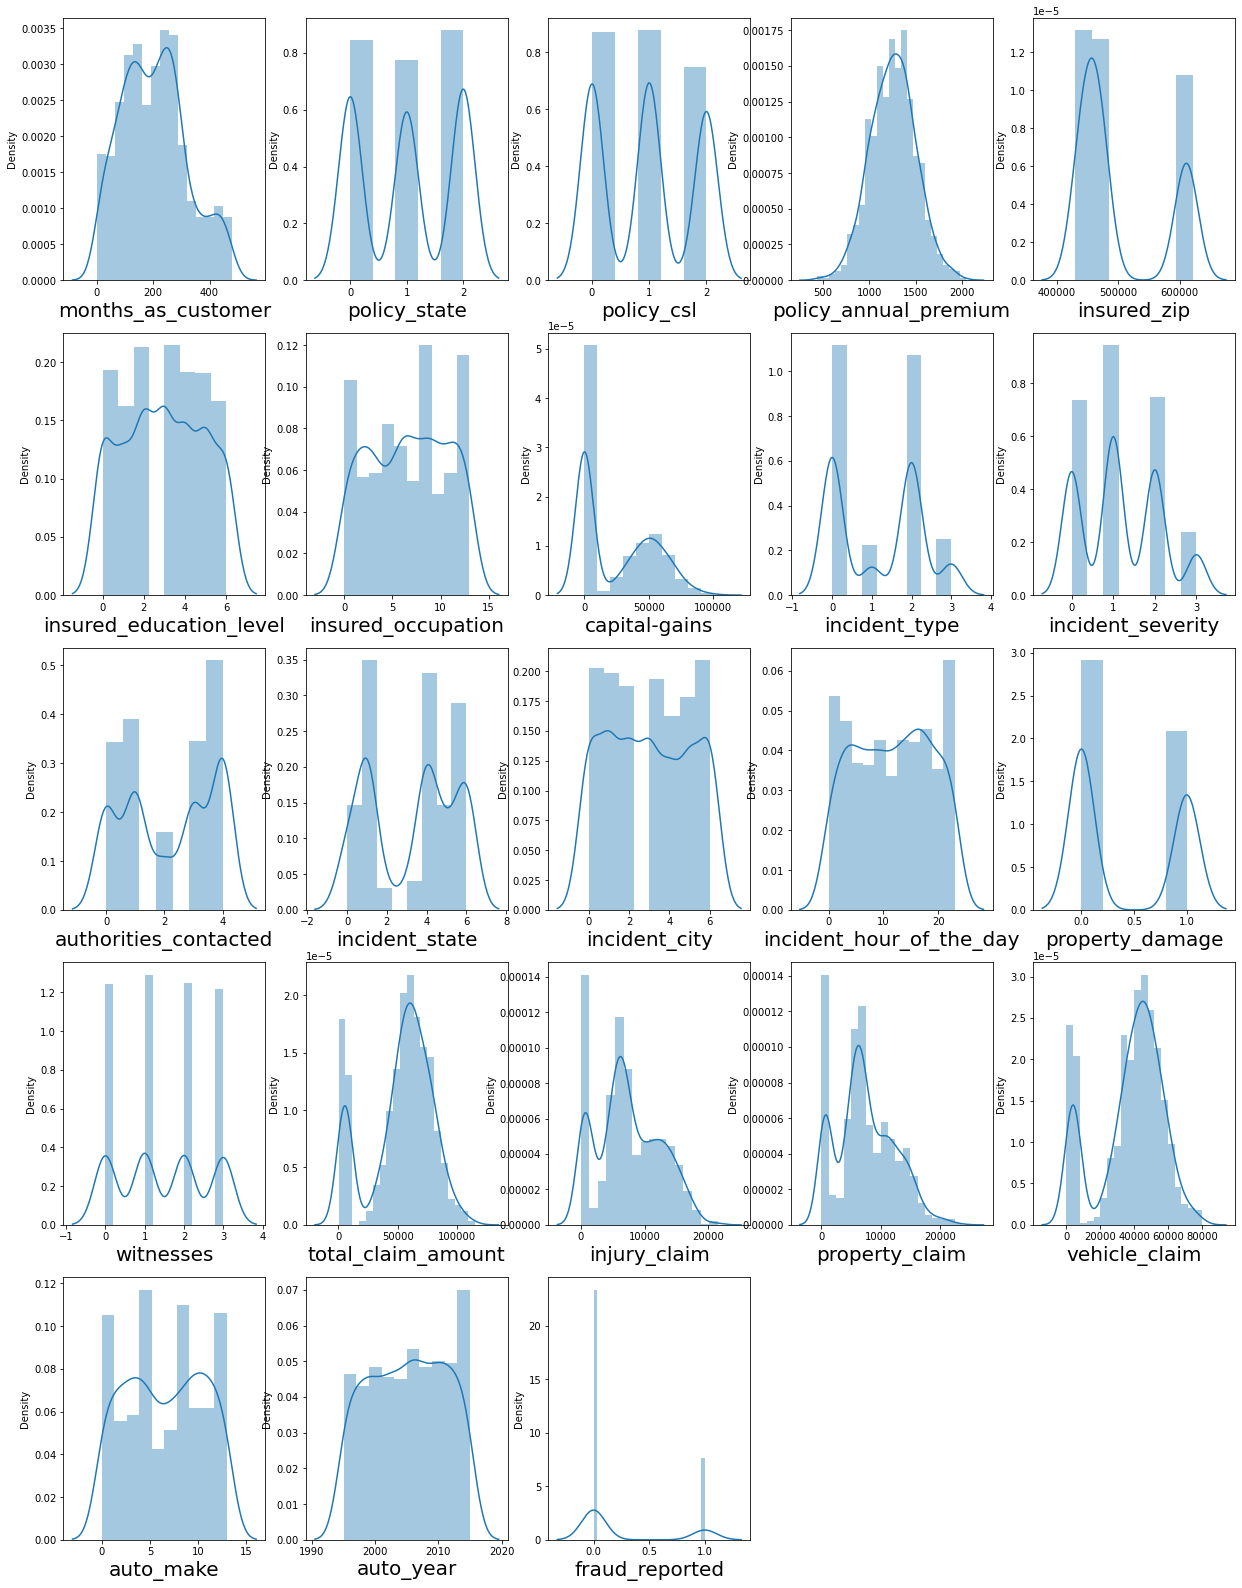

In [127]:
plt.figure(figsize=(21,28))
plotnumber=1
for column in df.columns:
    if plotnumber<=len(df.columns):
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Apart from policy annual premium all other show some skewness and variations in the data

# Describe the Dataset

In [129]:
df.describe()

,months_as_customer,policy_state,policy_csl,policy_annual_premium,insured_zip,insured_education_level,insured_occupation,capital-gains,incident_type,incident_severity,...,incident_hour_of_the_day,property_damage,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,1.01400,0.951000,1256.406150,501214.488000,2.966000,6.653000,25126.100000,1.172000,1.184000,...,11.644000,0.41700,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,2005.103000,0.247000
std,115.113174,0.83096,0.804516,244.167395,71701.610941,1.948497,4.019048,27872.187708,1.081474,0.939695,...,6.951373,0.49331,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,6.015861,0.431483
min,0.000000,0.00000,0.000000,433.330000,430104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,1995.000000,0.000000
25%,115.750000,0.00000,0.000000,1089.607500,448404.500000,1.000000,3.000000,0.000000,0.000000,0.000000,...,6.000000,0.00000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,2000.000000,0.000000
50%,199.500000,1.00000,1.000000,1257.200000,466445.500000,3.000000,7.000000,0.000000,1.000000,1.000000,...,12.000000,0.00000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,2005.000000,0.000000
75%,276.250000,2.00000,2.000000,1415.695000,603251.000000,5.000000,10.000000,51025.000000,2.000000,2.000000,...,17.000000,1.00000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,2010.000000,0.000000
max,479.000000,2.00000,2.000000,2047.590000,620962.000000,6.000000,13.000000,100500.000000,3.000000,3.000000,...,23.000000,1.00000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,2015.000000,1.000000


<AxesSubplot:>

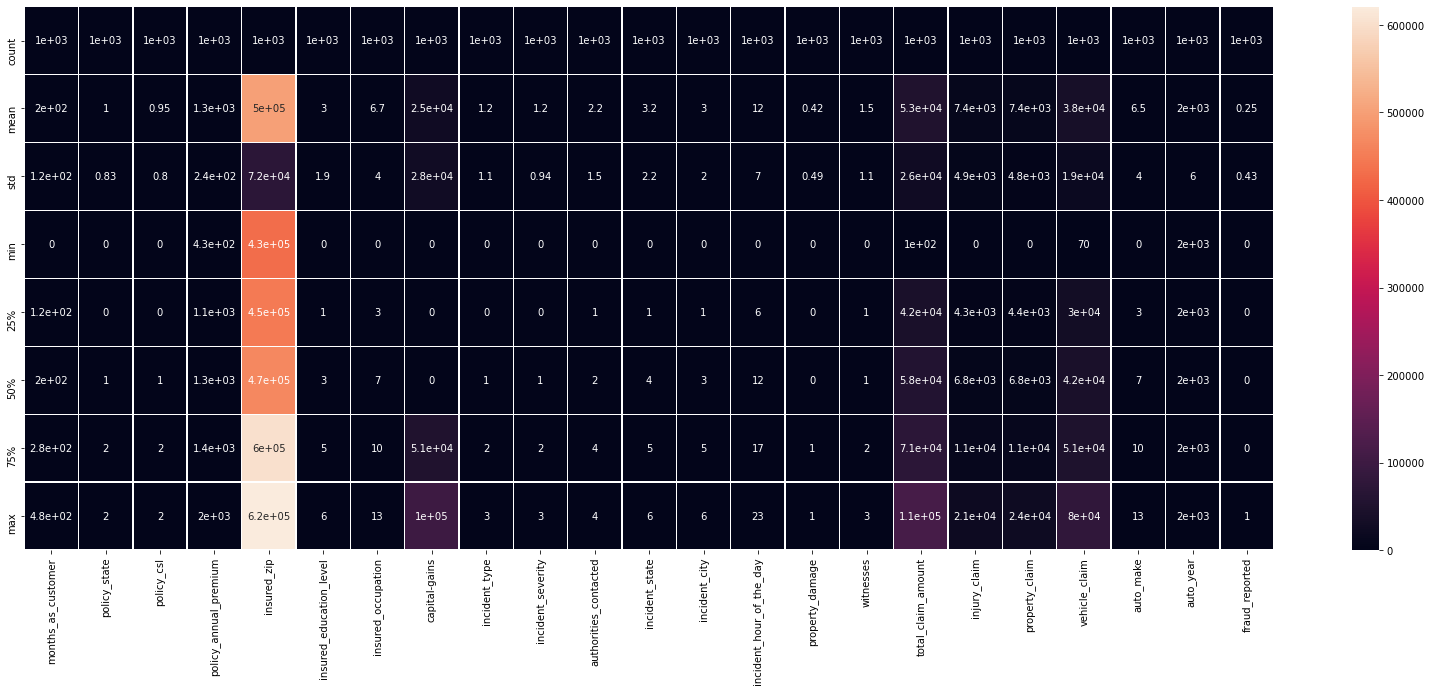

In [134]:
plt.figure(figsize=(28,10))
sns.heatmap(df.describe(),annot=True,linewidth=0.5)

In [135]:
df.corr()

,months_as_customer,policy_state,policy_csl,policy_annual_premium,insured_zip,insured_education_level,insured_occupation,capital-gains,incident_type,incident_severity,...,incident_hour_of_the_day,property_damage,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
months_as_customer,1.000000,-0.000328,-0.026819,0.005018,0.017895,-0.000833,0.009814,0.006399,-0.017377,-0.059581,...,0.070639,-0.000050,0.058383,0.062108,0.065329,0.034940,0.061013,0.047655,-0.000292,0.020544
policy_state,-0.000328,1.000000,0.001027,0.012455,0.008777,-0.034327,-0.031215,0.074551,0.031848,-0.026377,...,0.029457,-0.048443,0.022960,-0.006002,-0.046290,0.008406,0.001425,0.017124,0.002114,0.029432
policy_csl,-0.026819,0.001027,1.000000,0.023978,0.006879,0.009153,0.015788,0.005249,0.011997,0.022530,...,-0.001869,-0.006474,0.071500,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,-0.033082,-0.037190
policy_annual_premium,0.005018,0.012455,0.023978,1.000000,0.032354,-0.019715,0.035922,-0.013738,0.053603,-0.011155,...,-0.001578,0.058479,0.002332,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.049226,-0.014480
insured_zip,0.017895,0.008777,0.006879,0.032354,1.000000,0.016079,-0.069077,0.006303,-0.010840,-0.023855,...,0.008274,0.010786,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,-0.032736,0.019368
insured_education_level,-0.000833,-0.034327,0.009153,-0.019715,0.016079,1.000000,-0.020298,0.039912,0.013704,-0.006420,...,-0.057061,-0.039388,0.019211,0.074226,0.081880,0.055794,0.068348,0.055202,0.043509,0.008808
insured_occupation,0.009814,-0.031215,0.015788,0.035922,-0.069077,-0.020298,1.000000,-0.007824,0.003842,0.004731,...,-0.018435,-0.040543,-0.014794,0.003692,0.020211,0.003004,-0.000829,0.042621,-0.006676,0.001564
capital-gains,0.006399,0.074551,0.005249,-0.013738,0.006303,0.039912,-0.007824,1.000000,-0.045857,-0.013396,...,-0.016406,-0.019284,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.052014,0.031398,-0.019173
incident_type,-0.017377,0.031848,0.011997,0.053603,-0.010840,0.013704,0.003842,-0.045857,1.000000,0.159915,...,-0.133387,-0.023874,-0.007299,-0.276686,-0.226704,-0.221409,-0.271635,-0.032784,-0.053191,-0.050376
incident_severity,-0.059581,-0.026377,0.022530,-0.011155,-0.023855,-0.006420,0.004731,-0.013396,0.159915,1.000000,...,-0.071946,-0.327638,-0.011127,-0.365295,-0.276980,-0.301861,-0.361958,-0.008571,-0.019646,-0.405988


<AxesSubplot:>

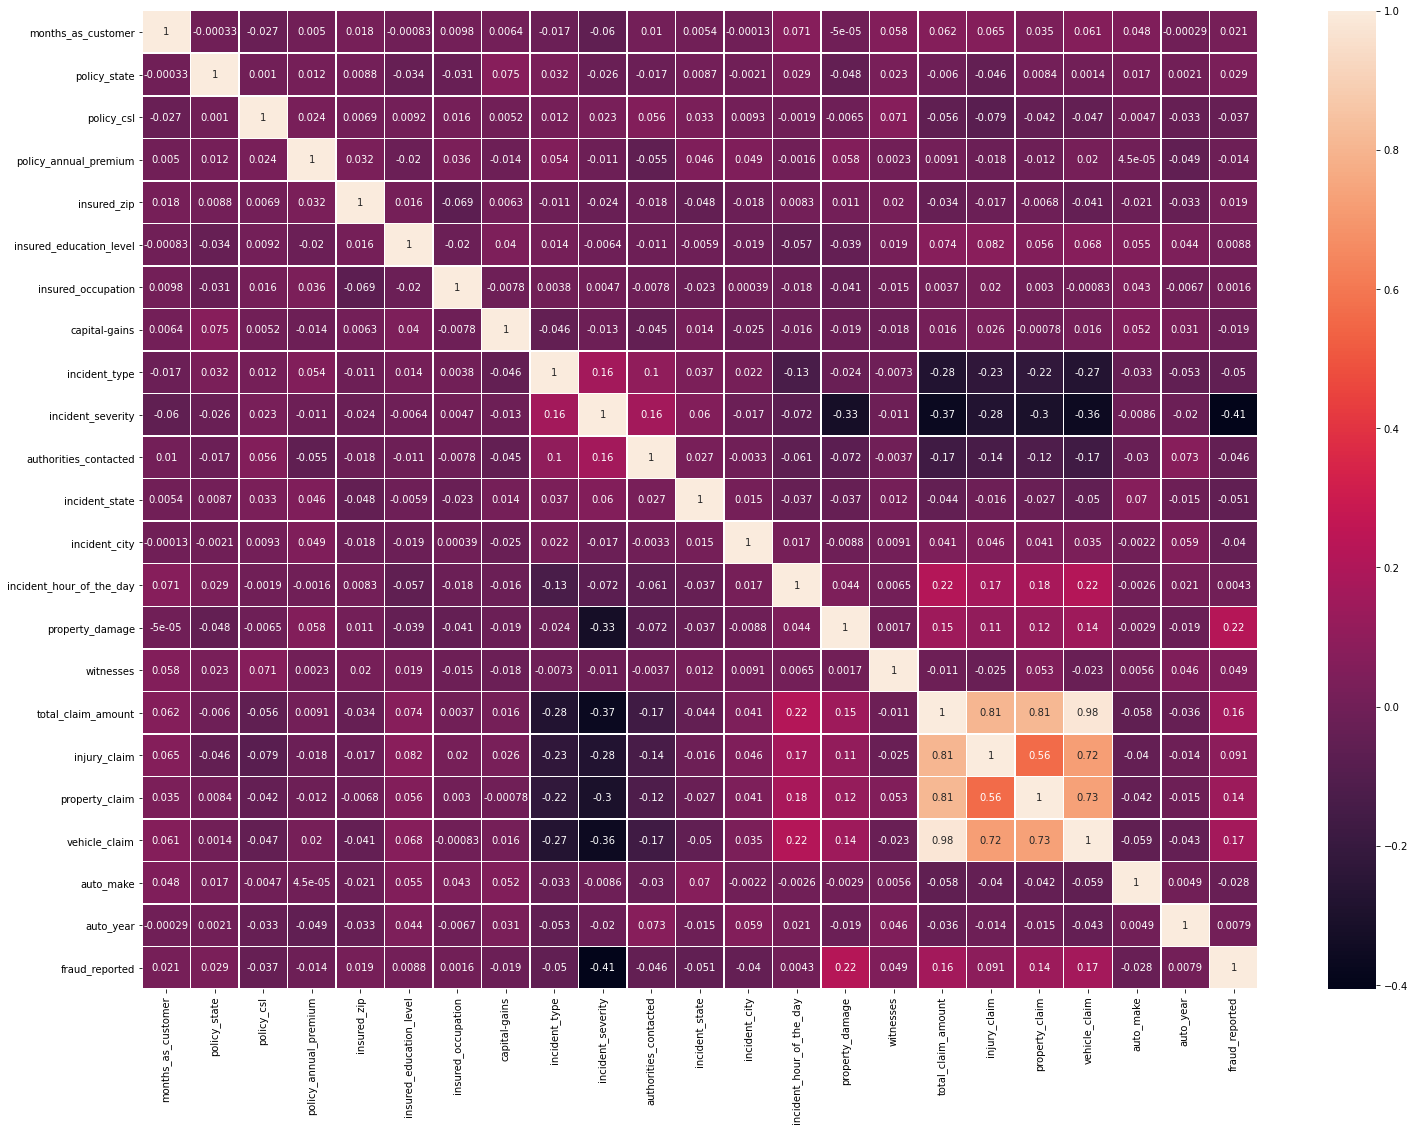

In [141]:
plt.figure(figsize=(25,18))
sns.heatmap(df.corr(),annot=True,linewidth=0.5)

# after the more correlation we can drop the least correlated columns

In [142]:
#droping the columns with least correlation
df=df.drop(['auto_year','incident_hour_of_the_day','insured_education_level'],axis=1)

In [143]:
df.shape

(1000, 20)

# checking for outliers and removing

months_as_customer          AxesSubplot(0.125,0.772143;0.110714x0.107857)
policy_state             AxesSubplot(0.257857,0.772143;0.110714x0.107857)
policy_csl               AxesSubplot(0.390714,0.772143;0.110714x0.107857)
policy_annual_premium    AxesSubplot(0.523571,0.772143;0.110714x0.107857)
insured_zip              AxesSubplot(0.656429,0.772143;0.110714x0.107857)
insured_occupation       AxesSubplot(0.789286,0.772143;0.110714x0.107857)
capital-gains               AxesSubplot(0.125,0.642714;0.110714x0.107857)
incident_type            AxesSubplot(0.257857,0.642714;0.110714x0.107857)
incident_severity        AxesSubplot(0.390714,0.642714;0.110714x0.107857)
authorities_contacted    AxesSubplot(0.523571,0.642714;0.110714x0.107857)
incident_state           AxesSubplot(0.656429,0.642714;0.110714x0.107857)
incident_city            AxesSubplot(0.789286,0.642714;0.110714x0.107857)
property_damage             AxesSubplot(0.125,0.513286;0.110714x0.107857)
witnesses                AxesSubplot(0

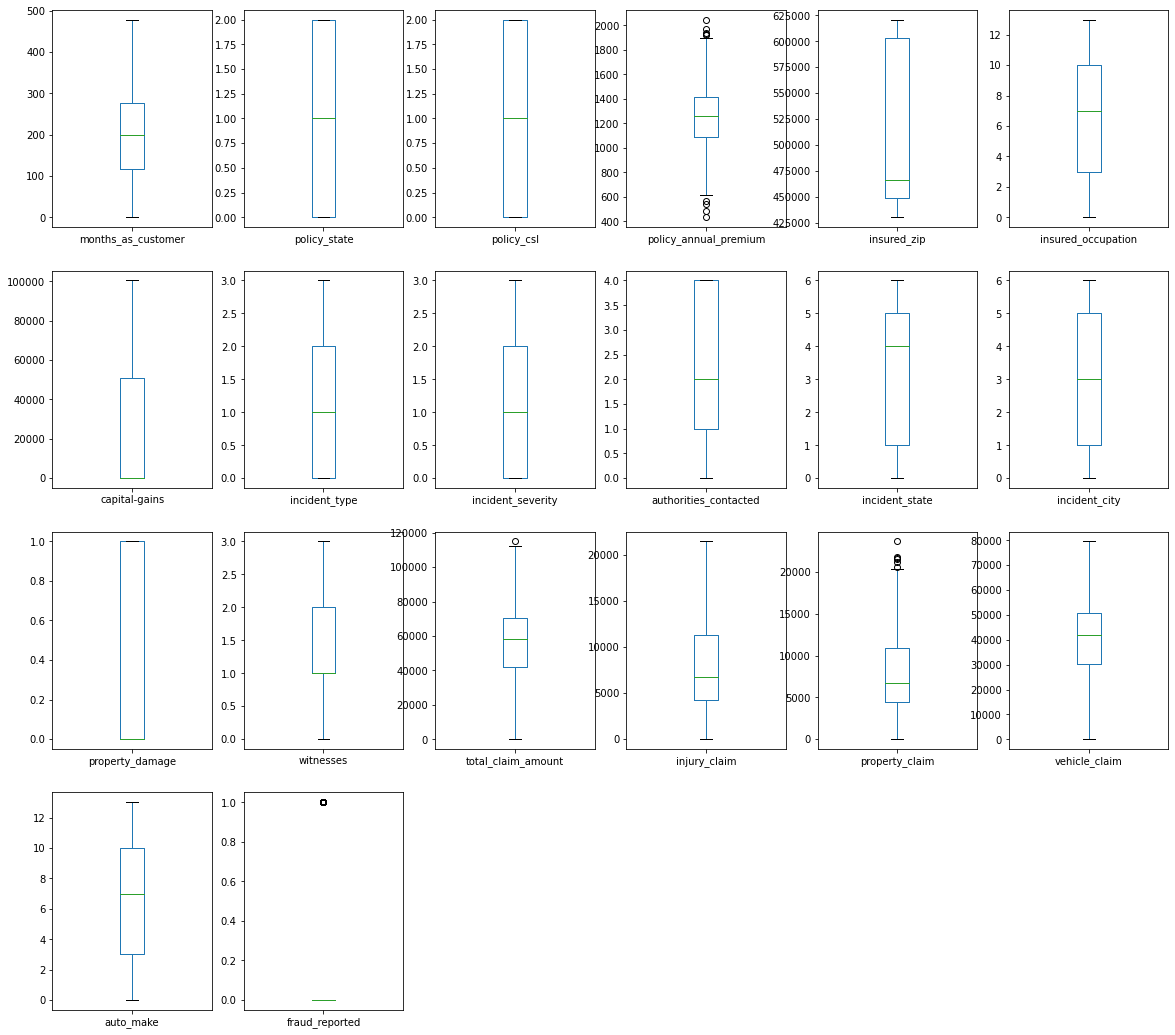

In [144]:
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(20,28))

In [145]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([229, 248, 500, 763], dtype=int64), array([ 3,  3, 16,  3], dtype=int64))


In [146]:
df1=df[(z<3).all(axis=1)]
df1

,months_as_customer,policy_state,policy_csl,policy_annual_premium,insured_zip,insured_occupation,capital-gains,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
0,328,2,1,1406.91,466132,2,53300,2,0,4,4,1,1,2,71610,6510,13020,52080,10,1
1,228,1,1,1197.22,468176,6,0,3,1,4,5,5,0,0,5070,780,780,3510,8,1
2,134,2,0,1413.14,430632,11,35100,0,1,4,1,1,0,3,34650,7700,3850,23100,4,0
3,256,0,1,1415.74,608117,1,48900,2,0,4,2,0,1,2,63400,6340,6340,50720,3,1
4,228,0,2,1583.91,610706,11,66000,3,1,2,1,0,0,1,6500,1300,650,4550,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,2,2,1310.80,431289,2,0,2,1,1,0,4,1,1,87200,17440,8720,61040,6,0
996,285,0,0,1436.79,608177,9,70900,2,0,1,4,3,1,3,108480,18080,18080,72320,13,0
997,130,2,1,1383.49,442797,1,35100,0,1,4,0,0,0,3,67500,7500,7500,52500,11,0
998,458,0,2,1356.92,441714,5,0,2,0,3,1,0,1,1,46980,5220,5220,36540,1,0


# Balancing the DataSet

In [147]:
dfx=df.iloc[:,0:-1]
dfy=df['fraud_reported']

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

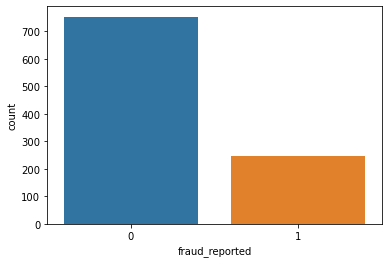

In [149]:
sns.countplot(dfy)

In [151]:
#use smote to balance the data
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(dfx,dfy)

In [152]:
y.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

# Now the Dataset is Balanced

# Remove Skewness from non categorical data

In [153]:
x.columns

Index(['months_as_customer', 'policy_state', 'policy_csl',
       'policy_annual_premium', 'insured_zip', 'insured_occupation',
       'capital-gains', 'incident_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make'],
      dtype='object')

In [158]:
x

,months_as_customer,policy_state,policy_csl,policy_annual_premium,insured_zip,insured_occupation,capital-gains,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make
0,328,2,1,1406.910000,466132,2,53300,2,0,4,4,1,1,2,71610,6510,13020,52080,10
1,228,1,1,1197.220000,468176,6,0,3,1,4,5,5,0,0,5070,780,780,3510,8
2,134,2,0,1413.140000,430632,11,35100,0,1,4,1,1,0,3,34650,7700,3850,23100,4
3,256,0,1,1415.740000,608117,1,48900,2,0,4,2,0,1,2,63400,6340,6340,50720,3
4,228,0,2,1583.910000,610706,11,66000,3,1,2,1,0,0,1,6500,1300,650,4550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,129,1,1,1133.989136,447699,9,0,2,2,1,0,2,1,3,86782,7730,15461,63590,8
1502,17,1,1,1188.122952,478906,2,0,2,1,3,0,2,0,2,48204,4438,8256,35509,1
1503,187,0,0,1411.036782,618428,10,0,1,0,0,4,0,0,2,44640,4529,4529,35582,7
1504,73,1,1,1177.816763,436190,4,29279,0,1,3,1,5,1,2,60216,9760,9760,40696,10


In [160]:
x.skew()

months_as_customer       0.353488
policy_state             0.146238
policy_csl               0.305567
policy_annual_premium   -0.040296
insured_zip              0.792207
insured_occupation      -0.043790
capital-gains            0.473652
incident_type            0.294275
incident_severity        0.677679
authorities_contacted    0.003257
incident_state          -0.052108
incident_city            0.205442
property_damage          0.432483
witnesses                0.112234
total_claim_amount      -0.756815
injury_claim             0.176632
property_claim           0.347968
vehicle_claim           -0.792543
auto_make                0.088530
dtype: float64

In [163]:
#remove skewness using power transform
from sklearn.preprocessing import power_transform
x[['insured_zip','total_claim_amount','vehicle_claim']]=power_transform(x[['insured_zip','total_claim_amount','vehicle_claim']],method='yeo-johnson')

In [166]:
x.skew()

months_as_customer       0.353488
policy_state             0.146238
policy_csl               0.305567
policy_annual_premium   -0.040296
insured_zip              0.641164
insured_occupation      -0.043790
capital-gains            0.473652
incident_type            0.294275
incident_severity        0.677679
authorities_contacted    0.003257
incident_state          -0.052108
incident_city            0.205442
property_damage          0.432483
witnesses                0.112234
total_claim_amount      -0.446017
injury_claim             0.176632
property_claim           0.347968
vehicle_claim           -0.456414
auto_make                0.088530
dtype: float64

# Feature scaling

In [167]:
#scaling non categorical data
sc=StandardScaler()
x[['insured_zip','total_claim_amount','vehicle_claim']]=sc.fit_transform(x[['insured_zip','total_claim_amount','vehicle_claim']])

# PCA

In [170]:
for i in range(2,20):
    pc=PCA(n_components=i)
    principalcomponents=pc.fit_transform(x)
    print(i,sum(pc.explained_variance_ratio_))

2 0.986544630200678
3 0.9999176671513376
4 0.9999848308975886
5 0.9999999443020673
6 0.9999999627700552
7 0.9999999803659453
8 0.9999999856053019
9 0.999999990251656
10 0.9999999928726582
11 0.9999999942801377
12 0.999999995571494
13 0.9999999967451625
14 0.9999999976568675
15 0.9999999984269278
16 0.9999999991330402
17 0.9999999997265551
18 0.9999999999996351
19 1.0


# No need to use PCA

# Model Building

In [171]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier() 
svc=SVC()
abc=AdaBoostClassifier()
gb=GradientBoostingClassifier()
rd=RidgeClassifier()
sgdc=SGDClassifier()
etc=ExtraTreesClassifier()

model=[lg,dtc,knn,rfc,svc,abc,gb,rd,sgdc,etc]

In [173]:
#testing the models and checking their accuracy, cross_val_score as well as roc_auc-score
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=82)
for m in model:
    m.fit(xtrain,ytrain)
    m.score(xtrain,ytrain)
    pred=m.predict(xtest)
    print('Accuracy score of ',m,'is :')
    print(accuracy_score(ytest,pred))
    score=cross_val_score(m,x,y,cv=5).mean()    
    print('cross_val score :',score)
    print(confusion_matrix(ytest,pred))
    print(classification_report(ytest,pred))
    print('roc auc score :',roc_auc_score(ytest,pred))
    print('\n')

Accuracy score of  LogisticRegression() is :
0.7152317880794702
cross_val score : 0.68268244923104
[[107  43]
 [ 43 109]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       150
           1       0.72      0.72      0.72       152

    accuracy                           0.72       302
   macro avg       0.72      0.72      0.72       302
weighted avg       0.72      0.72      0.72       302

roc auc score : 0.7152192982456141


Accuracy score of  DecisionTreeClassifier() is :
0.7748344370860927
cross_val score : 0.7709885371058942
[[113  37]
 [ 31 121]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       150
           1       0.77      0.80      0.78       152

    accuracy                           0.77       302
   macro avg       0.78      0.77      0.77       302
weighted avg       0.78      0.77      0.77       302

roc auc score : 0.7746929824561403


Accuracy score of  KNe

# in the above code we checked the models and their accuracy score, roc-auc_score and cross_val_score

# we saw that the Random forest classifier, Gradient boosting classifier and Extratreesclassifier are the best performing models with close to 87% accuracy score and also 86% cross_val_mean score

# we will hypertune these models and will save the best model for this datset

# Gradient boosting classifier

In [175]:
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150]}
gd=GridSearchCV(gbr,parameters)
gd.fit(x,y)
print(gd.best_params_)

{'learning_rate': 0.1, 'n_estimators': 150}


In [178]:
gb=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.1, n_estimators= 150)
gb.fit(xtrain,ytrain)
gb.score(x,y)
pred=gb.predict(xtest)
print('roc_auc score : ',roc_auc_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))
print('accuracy_score :',accuracy_score(ytest,pred))

roc_auc score :  0.8312280701754386
[[127  23]
 [ 28 124]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       150
           1       0.84      0.82      0.83       152

    accuracy                           0.83       302
   macro avg       0.83      0.83      0.83       302
weighted avg       0.83      0.83      0.83       302

accuracy_score : 0.8311258278145696


In [179]:
gb=GradientBoostingClassifier(criterion='friedman_mse',loss= 'exponential', n_estimators= 100)
gb.fit(xtrain,ytrain)
gb.score(x,y)
pred=gb.predict(x)
print('roc_auc score : ',roc_auc_score(y,pred))
print(confusion_matrix(y,pred))
print(classification_report(y,pred))
print('accuracy_score :',accuracy_score(y,pred))

roc_auc score :  0.8911022576361222
[[676  77]
 [ 87 666]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       753
           1       0.90      0.88      0.89       753

    accuracy                           0.89      1506
   macro avg       0.89      0.89      0.89      1506
weighted avg       0.89      0.89      0.89      1506

accuracy_score : 0.8911022576361222


# Random forest Classifier

In [180]:
rfc=RandomForestClassifier()
parameters={"n_estimators":[10,100,150],"max_features": ["auto", "sqrt", "log2"],'criterion':['gini', 'entropy']}
clf=GridSearchCV(rfc,parameters,cv=5,scoring='roc_auc')
clf.fit(xtrain,ytrain)
clf.best_params_

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 150}

In [182]:
rfc=RandomForestClassifier(n_estimators=150,max_features='log2',criterion='entropy')
rfc.fit(xtrain,ytrain)
pred=rfc.predict(xtest)
print('roc_auc score : ',roc_auc_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))
print('accuracy_score :',accuracy_score(ytest,pred))

roc_auc score :  0.8708333333333333
[[130  20]
 [ 19 133]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       150
           1       0.87      0.88      0.87       152

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.87      0.87      0.87       302

accuracy_score : 0.8708609271523179


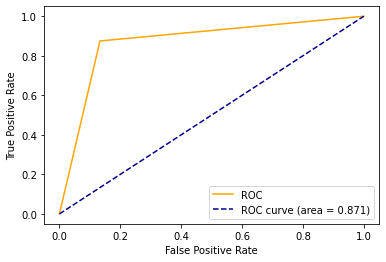

In [184]:
fpr, tpr, threshold = roc_curve(ytest,pred)
auc = roc_auc_score(ytest,pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# testing on whole dataset

In [185]:
rfc=RandomForestClassifier(n_estimators=150,max_features='log2',criterion='entropy')
rfc.fit(x,y)
pred=rfc.predict(x)
print('roc_auc score : ',roc_auc_score(y,pred))
print(confusion_matrix(y,pred))
print(classification_report(y,pred))
print('accuracy_score :',accuracy_score(y,pred))

roc_auc score :  1.0
[[753   0]
 [  0 753]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       753
           1       1.00      1.00      1.00       753

    accuracy                           1.00      1506
   macro avg       1.00      1.00      1.00      1506
weighted avg       1.00      1.00      1.00      1506

accuracy_score : 1.0


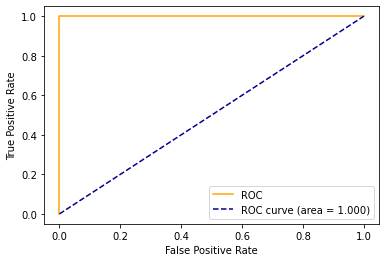

In [186]:
fpr, tpr, threshold = roc_curve(y,pred)
auc = roc_auc_score(y,pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# ExtraTreesClassifier

In [188]:
parameters={'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2'],'max_depth':[1,3,5,10]}
gd=GridSearchCV(ExtraTreesClassifier(), parameters, cv=5,scoring="roc_auc")
gd.fit(x,y)
gd.best_params_

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto'}

In [189]:
etc=ExtraTreesClassifier(criterion='gini',max_depth=10,max_features='auto')
etc.fit(xtrain,ytrain)
pred=etc.predict(xtest)
print('roc_auc score : ',roc_auc_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))
print('accuracy_score :',accuracy_score(ytest,pred))

roc_auc score :  0.854342105263158
[[129  21]
 [ 23 129]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       150
           1       0.86      0.85      0.85       152

    accuracy                           0.85       302
   macro avg       0.85      0.85      0.85       302
weighted avg       0.85      0.85      0.85       302

accuracy_score : 0.8543046357615894


# From the above after testing the Best models with the best parameters we found

# RandomForestClassifier as the best model with close to 88% roc_auc score

In [191]:
x['predicted']=rfc.predict(x)
x['actual']=y

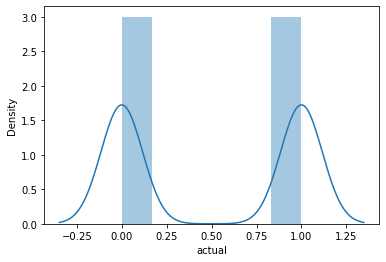

<AxesSubplot:xlabel='predicted', ylabel='Density'>

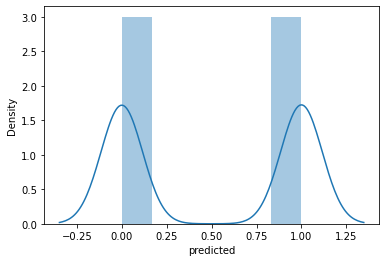

In [193]:
#checking how similar are actual data and predicted data
sns.distplot(x['actual'])
plt.show()
sns.distplot(x['predicted'])

# Actual and predicted data are very similar to each other

# Save the model RandomForestClassifier

In [195]:
joblib.dump(rfc,'insurance.obj')

['insurance.obj']